<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Importing Libraries</b>
</div>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import networkx as nx
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b>The Dataset and EDA</b>
</div>

In [2]:
br= pd.read_csv('/Users/alisoliman/Downloads/masr elraqmia/labs/final project/Breast cancer Project/Breast Cancer.csv')
br.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [3]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print(br.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
br.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
br.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
br = br.drop('Unnamed: 32',axis = 1)

In [8]:
br.duplicated().sum()

0

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid rgb(68, 247, 125);
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Plots before handling outliers</b>
</div>


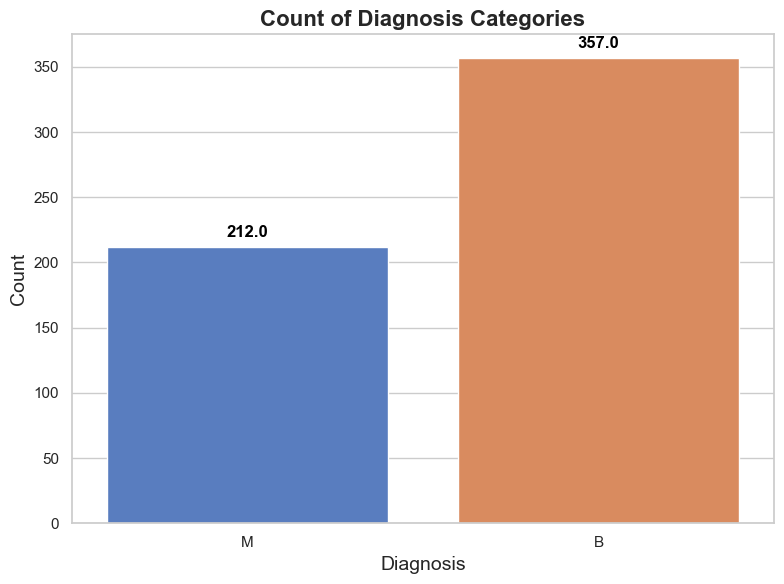

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set background style for a cleaner look

# Customizing the count plot
ax = sns.countplot(x='diagnosis', data=br, hue='diagnosis', palette='muted', legend=False)

# Add title and labels
ax.set_title('Count of Diagnosis Categories', fontsize=16, weight='bold')
ax.set_xlabel('Diagnosis', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12,
                color='black', fontweight='bold', xytext=(0, 10),
                textcoords='offset points')

# Adjusting layout
plt.tight_layout()
plt.show()


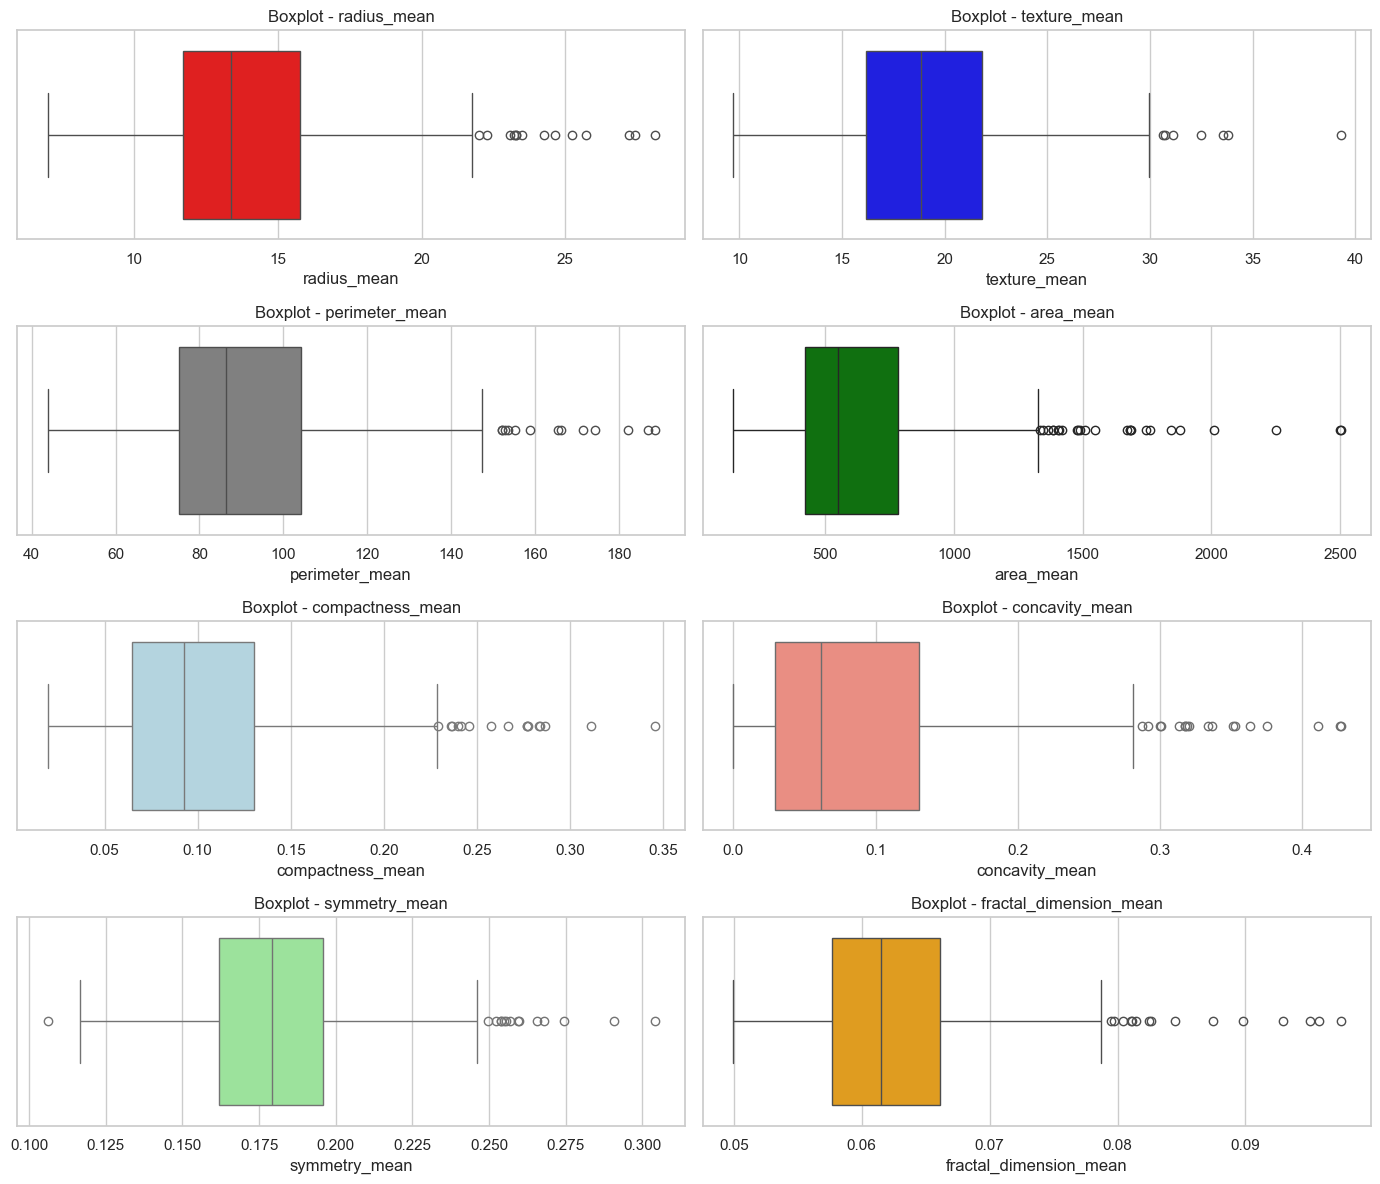

In [10]:
plt.figure(figsize=(14, 12))

features = [
    ('radius_mean', 'red'),
    ('texture_mean', 'blue'),
    ('perimeter_mean', 'gray'),
    ('area_mean', 'green'),
    ('compactness_mean', 'lightblue'),
    ('concavity_mean', 'salmon'),
    ('symmetry_mean', 'lightgreen'),
    ('fractal_dimension_mean', 'orange')
]

for i, (feature, color) in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=br[feature], color=color)
    plt.title(f"Boxplot - {feature}")

plt.tight_layout()
plt.show()



<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b> (diagnosis)  لتحليل العلاقة بين متوسط سمات الخلايا في بيانات الأورام حسب نوع التشخيص Histogram< & check for normality and distribution of the data
</div>

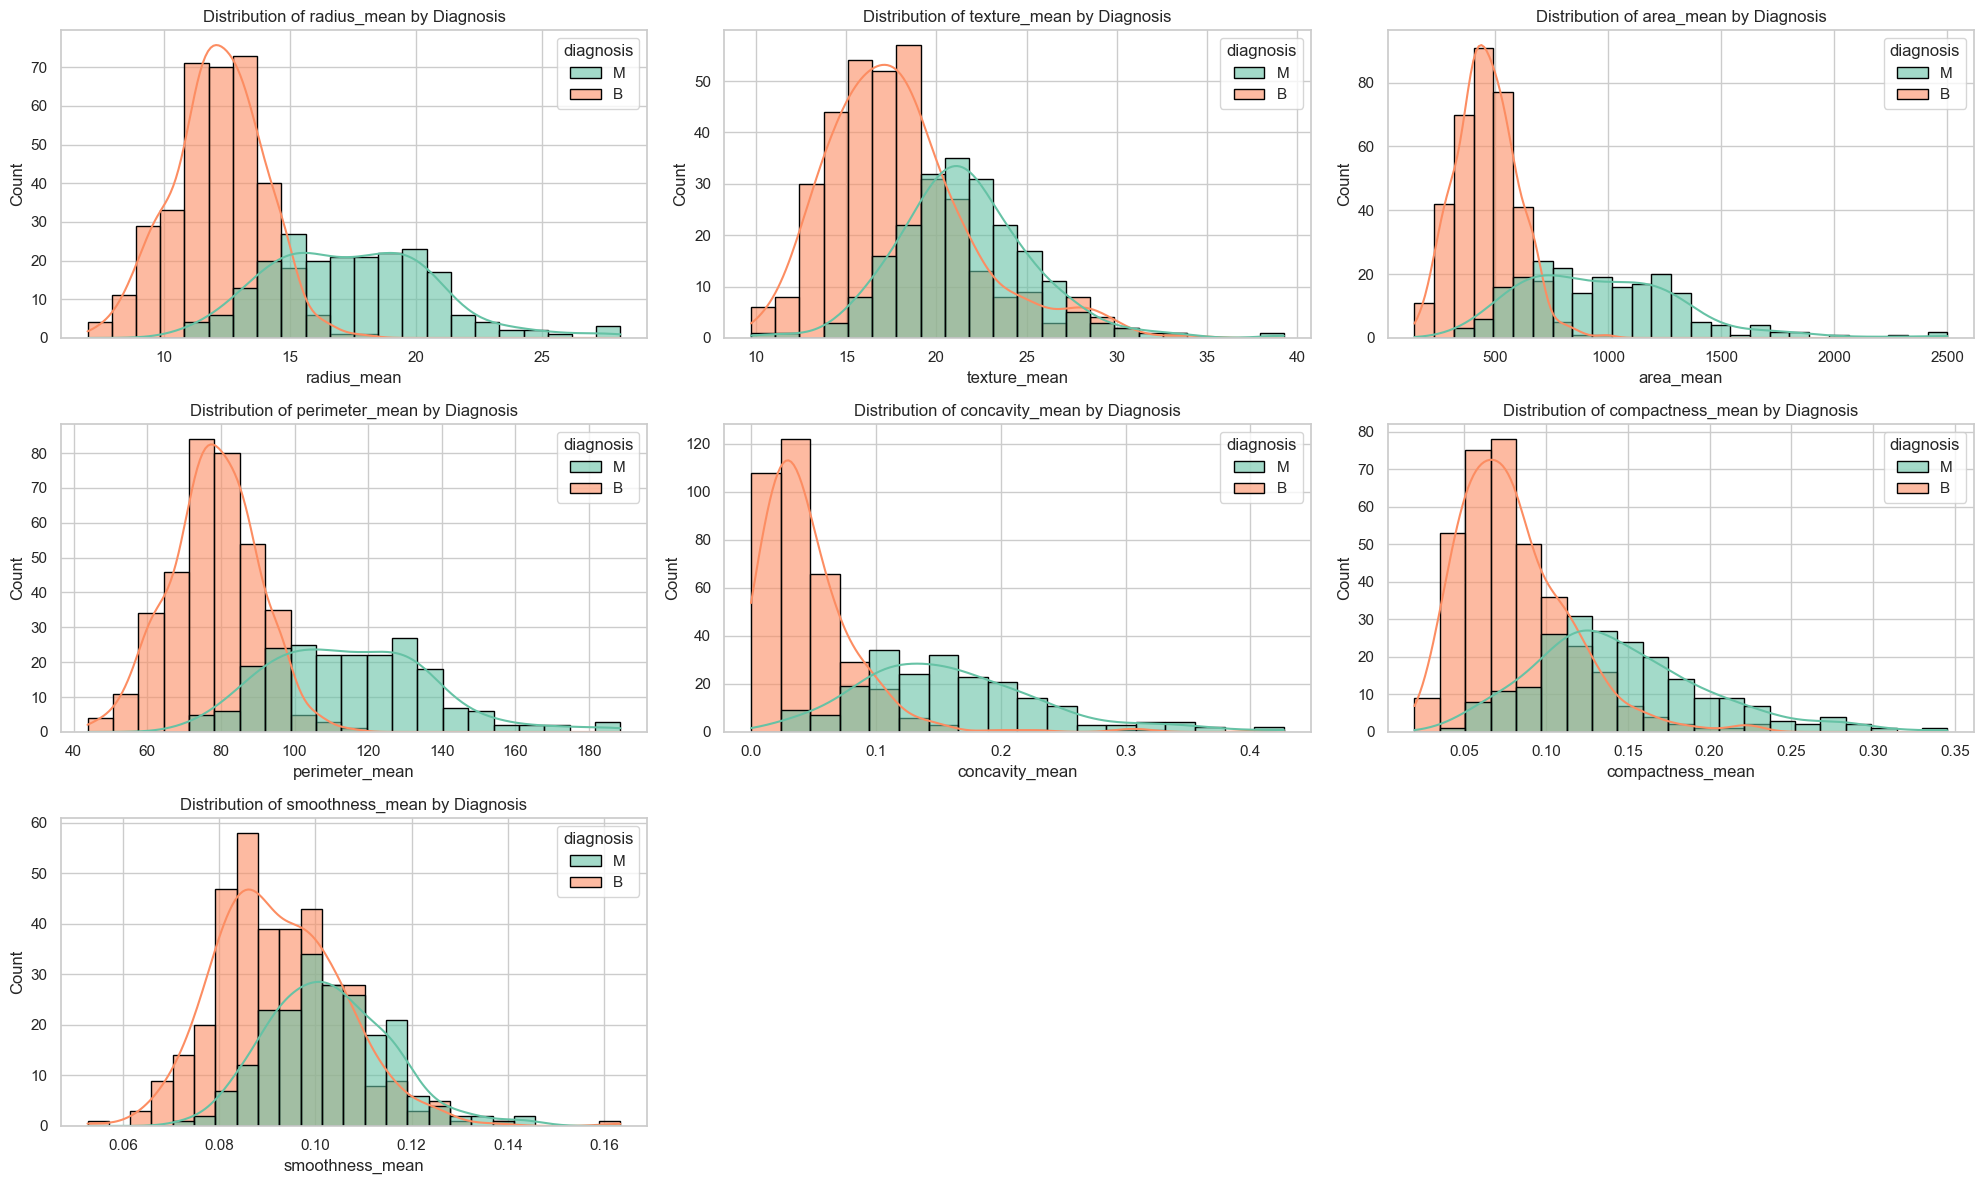

In [11]:
columns_to_plot = [
    'radius_mean', 'texture_mean', 'area_mean',
    'perimeter_mean', 'concavity_mean', 'compactness_mean', 'smoothness_mean'
]

# عدد الأعمدة
n = len(columns_to_plot)

# حجم الشكل
plt.figure(figsize=(20, 4 * ((n + 2) // 3)))

for i, col in enumerate(columns_to_plot):
    plt.subplot((n + 2) // 3, 3, i + 1)
    sns.histplot(data=br, x=col, hue='diagnosis', kde=True, palette='Set2', edgecolor='black', alpha=0.6)
    plt.title(f'Distribution of {col} by Diagnosis')

plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>pairwise realationships between first 8 features</b>
</div>

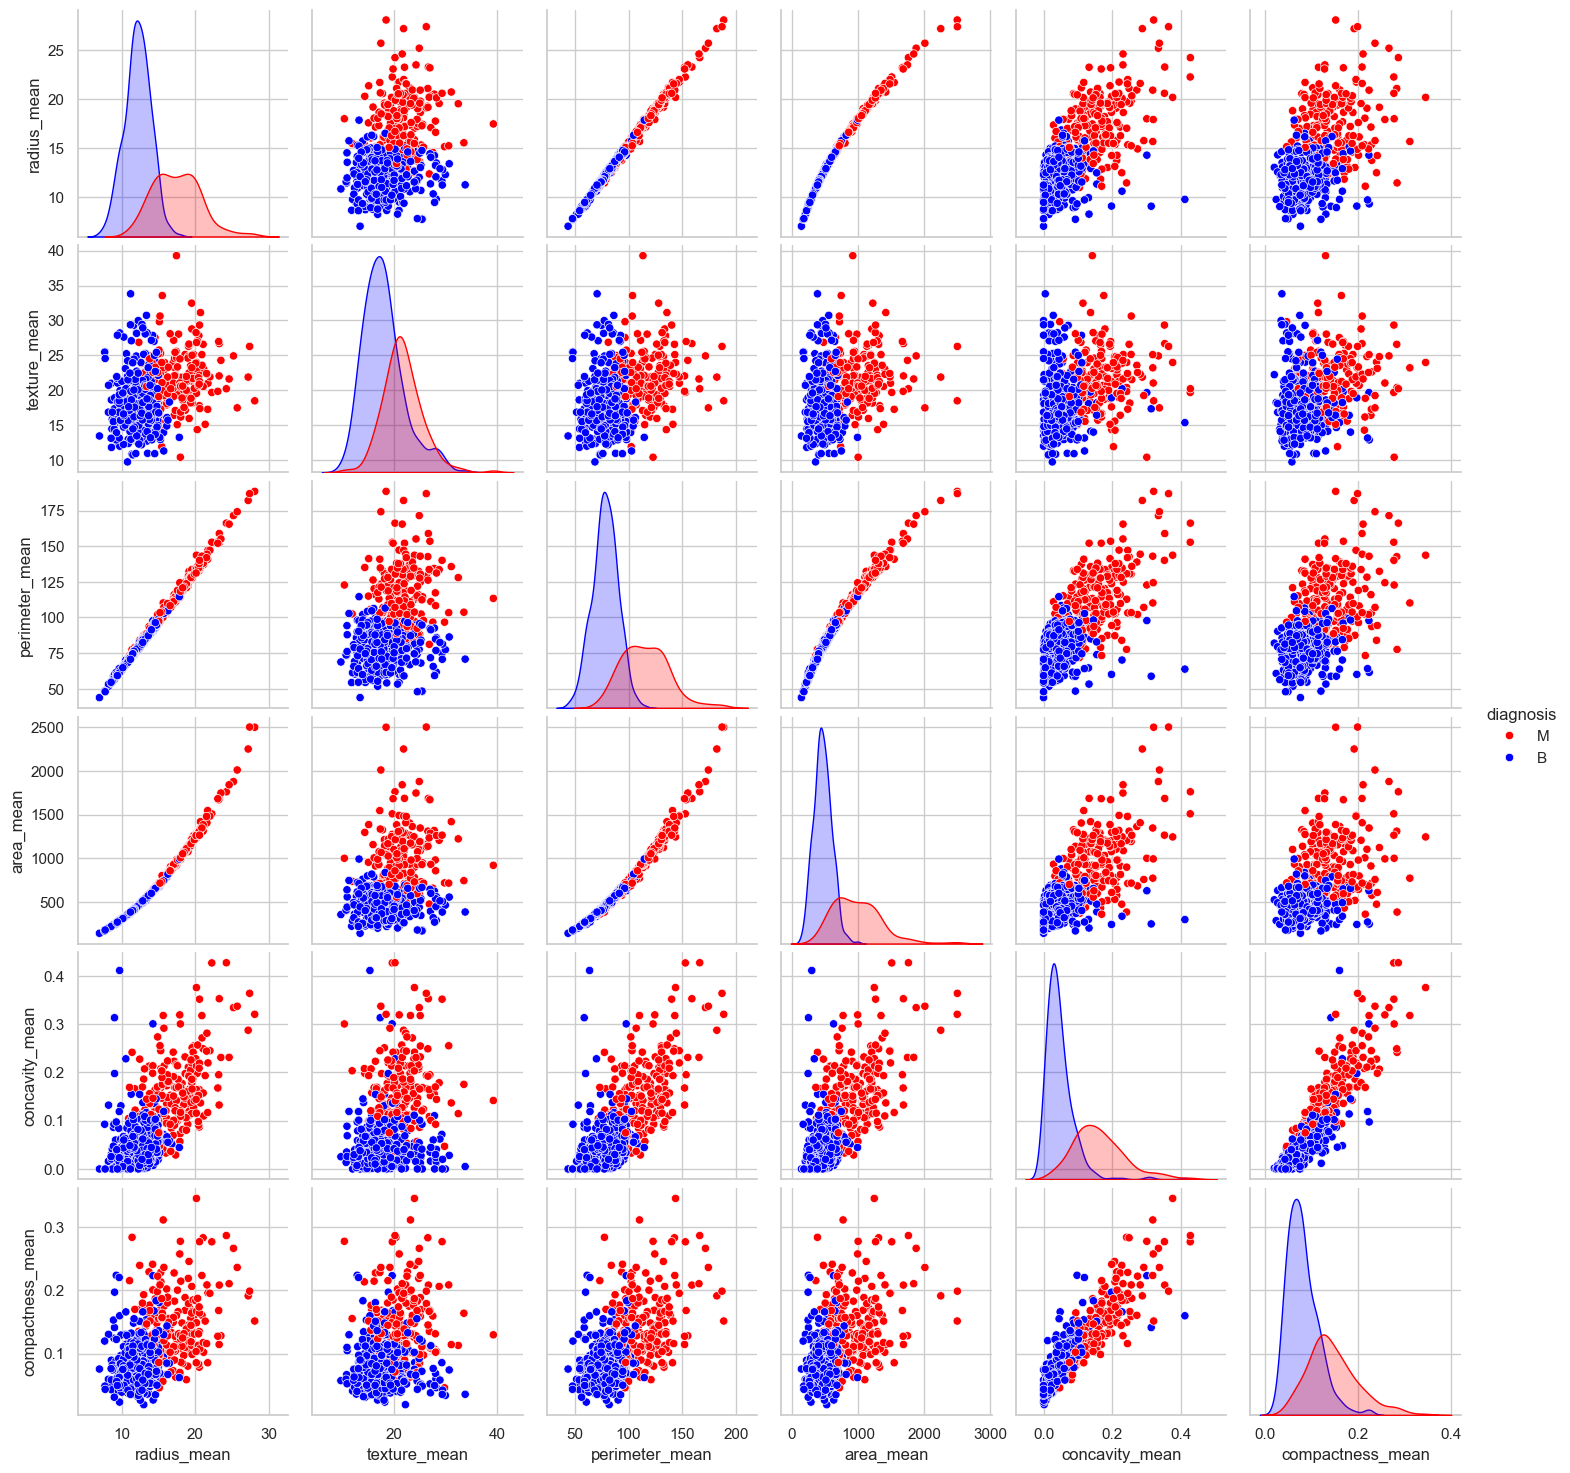

In [12]:
selected_cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean',
    'area_mean', 'concavity_mean', 'compactness_mean', 'diagnosis'
]

sns.pairplot(br[selected_cols], hue='diagnosis', palette={'M': 'red', 'B': 'blue'})


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #FF9B50;
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Handling outliers using IQR</b>
</div>


In [13]:
# Function to identify outliers using IQR
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

# Detect outliers in the dataset
outliers = detect_outliers(br.drop('diagnosis',axis=1))  # Exclude the target column
print(outliers.sum())  # Display the count of outliers per feature


id                         81
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


In [14]:
# Remove rows with outliers
df_no_outliers = br[~outliers.any(axis=1)]

print("Data shape before removing outliers:", br.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)

Data shape before removing outliers: (569, 32)
Data shape after removing outliers: (346, 32)


In [15]:
import numpy as np
# Function to cap outliers at upper and lower limits for each column
def cap_outliers(df):
    df_capped = df.copy()  # Make a copy of the DataFrame
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values below the lower bound
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
        
        # Cap values above the upper bound
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
    
    return df_capped

# Cap outliers in the features (excluding the 'diagnosis' column)
df_capped = cap_outliers(br.drop('diagnosis', axis=1))  # Exclude the target column

# Add the 'diagnosis' column back to the DataFrame
df_capped['diagnosis'] = br['diagnosis']

print("Data shape after capping outliers:", df_capped.shape)


Data shape after capping outliers: (569, 32)


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid rgb(68, 247, 125);
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>Plots after handling outliers</b>
</div>


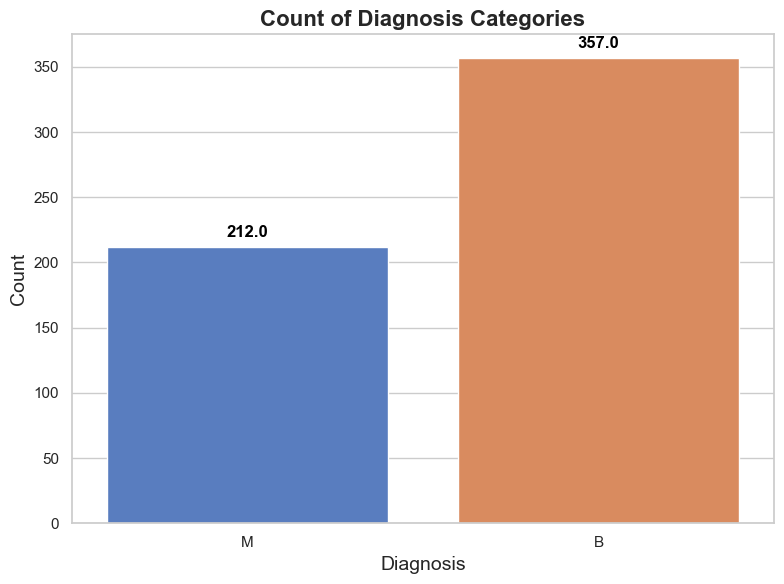

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set background style for a cleaner look

# Customizing the count plot
ax = sns.countplot(x='diagnosis', data=df_capped, hue='diagnosis', palette='muted', legend=False)

# Add title and labels
ax.set_title('Count of Diagnosis Categories', fontsize=16, weight='bold')
ax.set_xlabel('Diagnosis', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12,
                color='black', fontweight='bold', xytext=(0, 10),
                textcoords='offset points')

# Adjusting layout
plt.tight_layout()
plt.show()


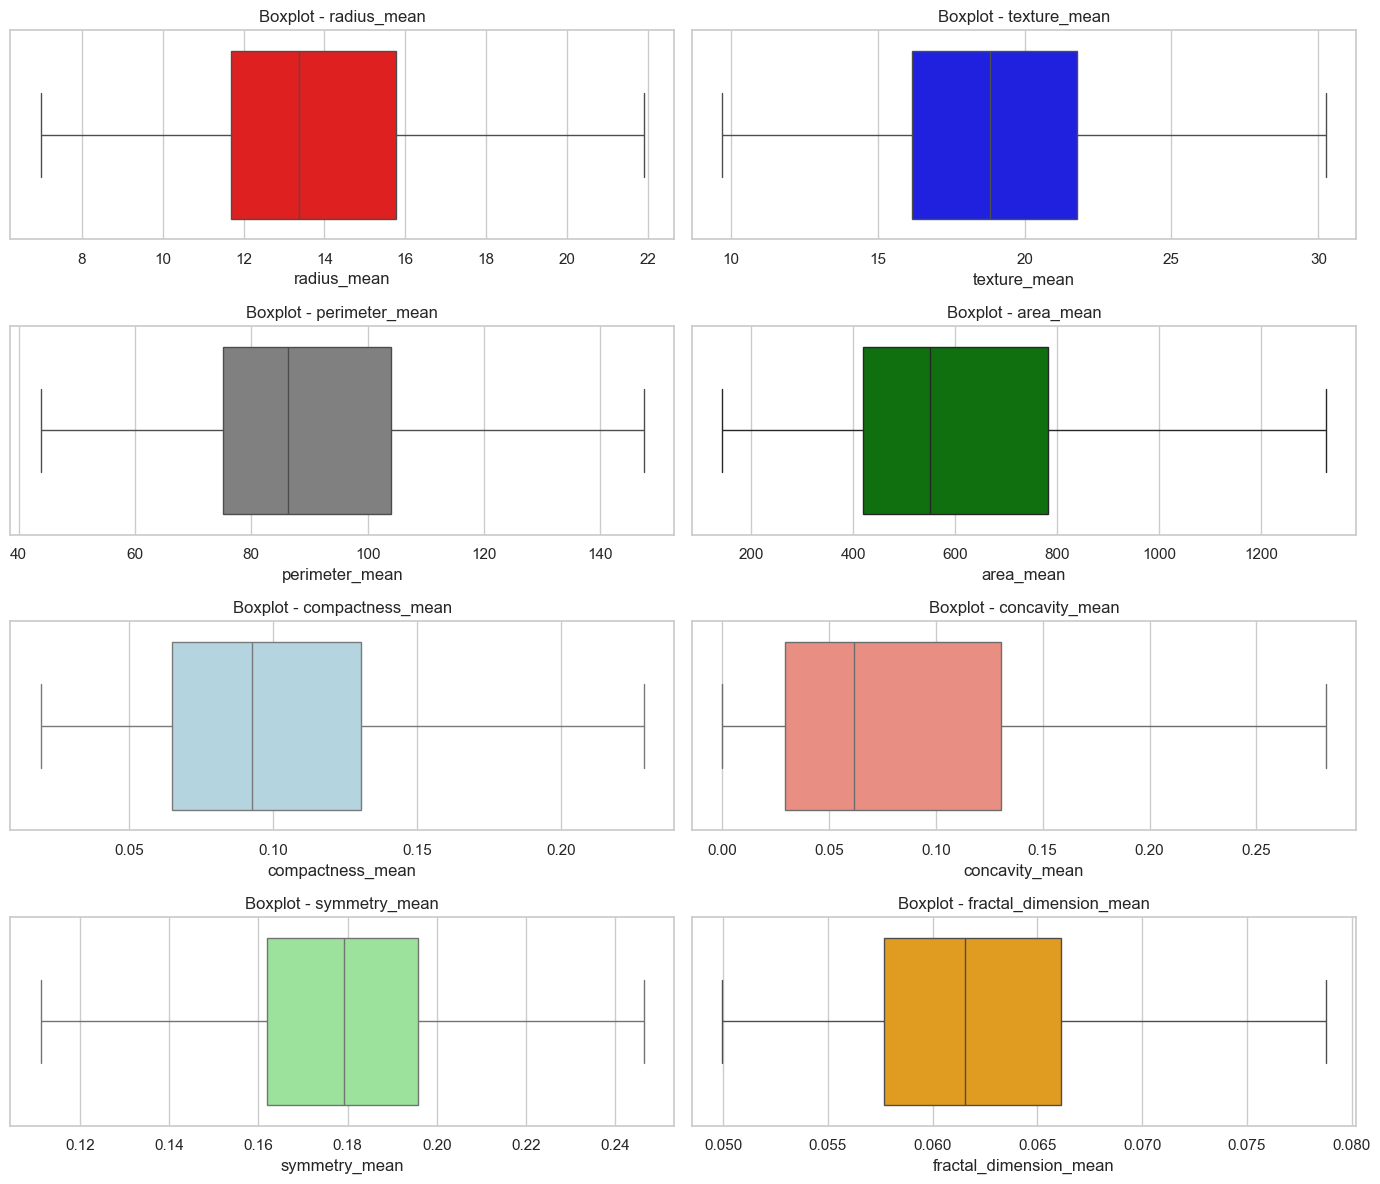

In [17]:
plt.figure(figsize=(14, 12))

features = [
    ('radius_mean', 'red'),
    ('texture_mean', 'blue'),
    ('perimeter_mean', 'gray'),
    ('area_mean', 'green'),
    ('compactness_mean', 'lightblue'),
    ('concavity_mean', 'salmon'),
    ('symmetry_mean', 'lightgreen'),
    ('fractal_dimension_mean', 'orange')
]

for i, (feature, color) in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df_capped[feature], color=color)
    plt.title(f"Boxplot - {feature}")

plt.tight_layout()
plt.show()



<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Correlation Heatmap</b></div>

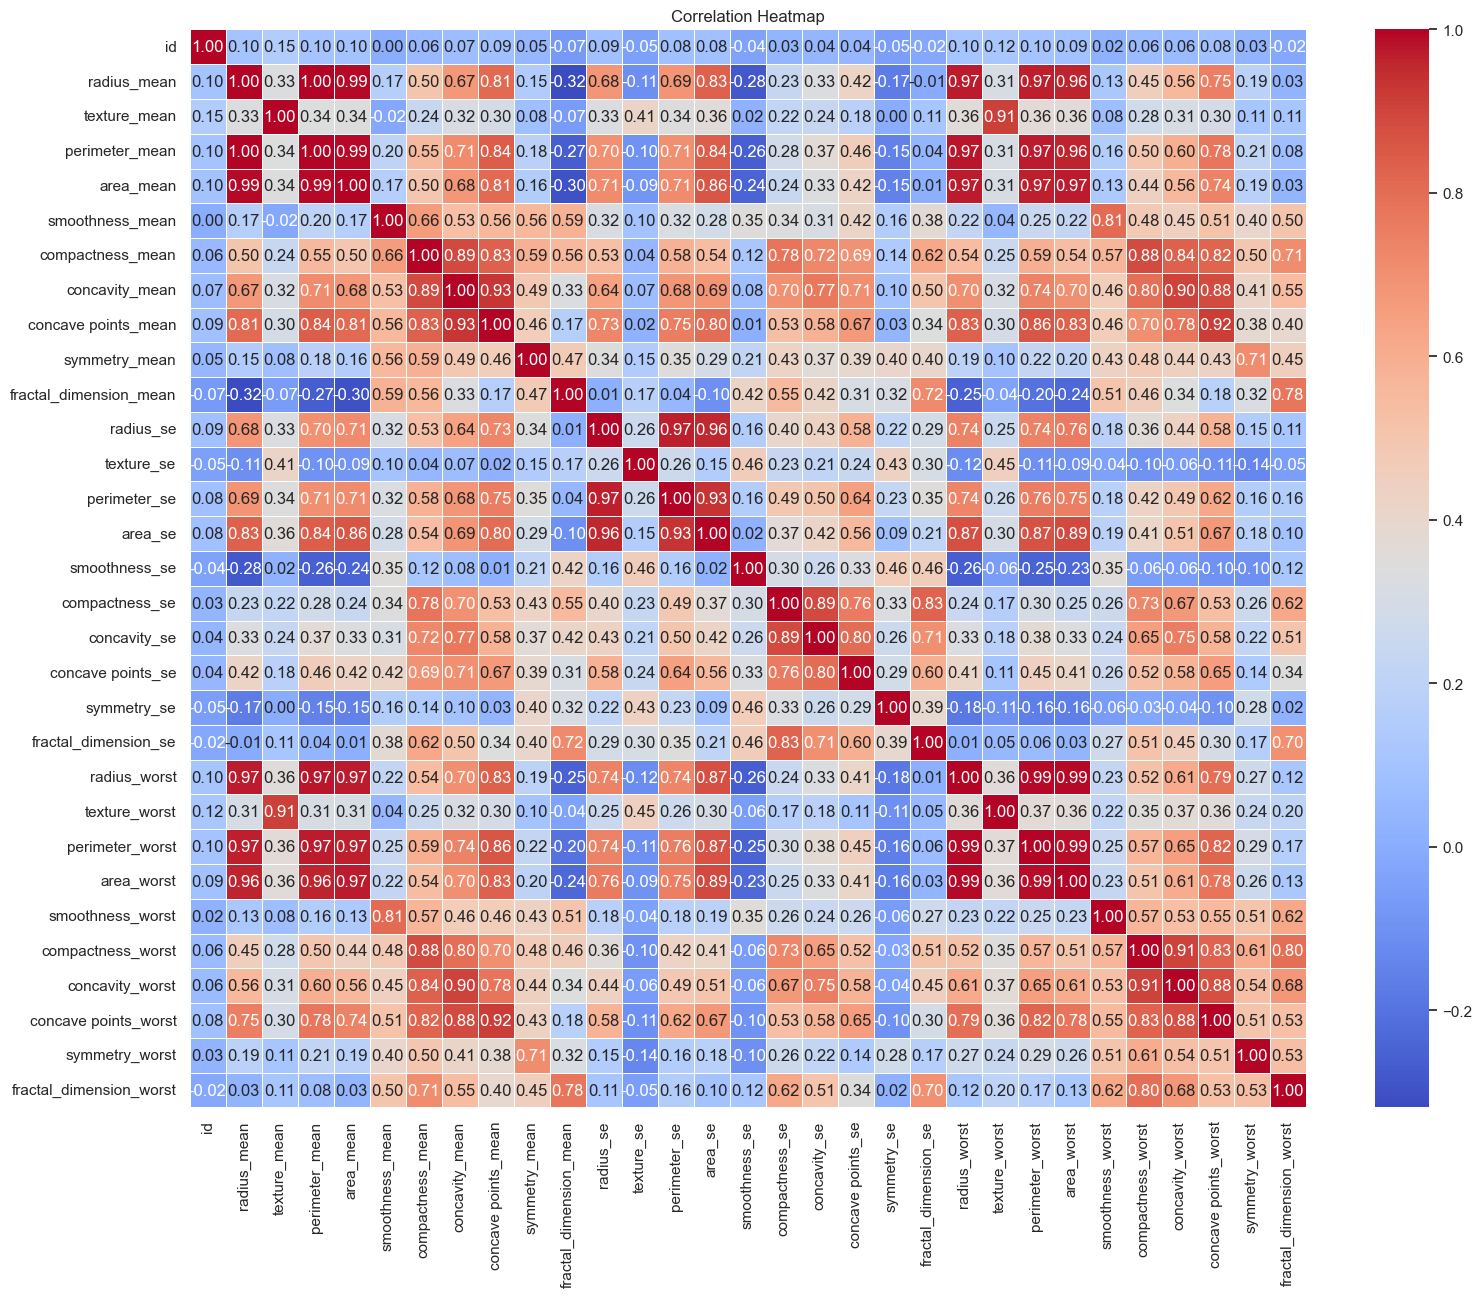

In [18]:
numeric_cols = df_capped.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #3498db;
            background-color:#1e272e;
            overflow:hidden;
            font-weight:700;
            text-shadow: 3px 3px 5px rgba(0, 0, 0, 0.6);">
   <b>Feature Subset Selection processing</b>
</div>

## move target column to end of data set

In [19]:
# Move the target column ('diagnosis') to the end
columns = [col for col in br.columns if col != 'diagnosis'] + ['diagnosis']
brr = br[columns]
brr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


## Encode the target column


In [20]:
#Convert 'diagnosis' to numeric: M -> 1, B -> 0
brr['diagnosis'] = brr['diagnosis'].map({'M': 1, 'B': 0})
brr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [21]:
brr = brr.drop(columns=['id'])
brr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# Calculate correlation of each feature with the target 'diagnosis'

In [22]:
correlations = brr.corr()['diagnosis'].drop('diagnosis')  

# Sort correlations by absolute value (from strongest to weakest)
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Save to list: (feature, correlation)
correlation_list = [round(correlations_sorted[feature], 4) for feature in correlations_sorted.index]

mean_correlation = np.mean(correlation_list)

# Print the result
print(f"The mean of the correlation is: {mean_correlation:.4f}")

The mean of the correlation is: 0.4703


In [23]:
# Print the sorted correlations
print(" Correlation of each feature with target (diagnosis):\n")
for feature, corr in correlations_sorted.items():
    print(f"{feature}: {corr:.4f}")

 Correlation of each feature with target (diagnosis):

concave points_worst: 0.7936
perimeter_worst: 0.7829
concave points_mean: 0.7766
radius_worst: 0.7765
perimeter_mean: 0.7426
area_worst: 0.7338
radius_mean: 0.7300
area_mean: 0.7090
concavity_mean: 0.6964
concavity_worst: 0.6596
compactness_mean: 0.5965
compactness_worst: 0.5910
radius_se: 0.5671
perimeter_se: 0.5561
area_se: 0.5482
texture_worst: 0.4569
smoothness_worst: 0.4215
symmetry_worst: 0.4163
texture_mean: 0.4152
concave points_se: 0.4080
smoothness_mean: 0.3586
symmetry_mean: 0.3305
fractal_dimension_worst: 0.3239
compactness_se: 0.2930
concavity_se: 0.2537
fractal_dimension_se: 0.0780
smoothness_se: 0.0670
fractal_dimension_mean: 0.0128
texture_se: 0.0083
symmetry_se: 0.0065


# calaculating the mean to use  as threshold of correlation

In [24]:
threshold =mean_correlation
highly_correlated_features = correlations[correlations.abs() > threshold].index.tolist()

# Create a new DataFrame with only the selected features + target
selected_data = brr[highly_correlated_features + ['diagnosis']]

# Print the selected features
print(f"Selected features with correlation greater than {threshold}:")

selected_data

Selected features with correlation greater than 0.4703366666666667:


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430,1
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216,1
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628,1
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418,1
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650,1


In [25]:
selected_data.groupby('diagnosis').mean()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
diagnosis,,,,,,,,,,,,,,,
0,12.146524,78.075406,462.790196,0.080085,0.046058,0.025717,0.284082,2.000321,21.135148,13.379801,87.005938,558.899440,0.182673,0.166238,0.074444
1,17.462830,115.365377,978.376415,0.145188,0.160775,0.087990,0.609083,4.323929,72.672406,21.134811,141.370330,1422.286321,0.374824,0.450606,0.182237


# Target & Features Split

In [26]:
X = selected_data.drop(columns='diagnosis', axis=1)
Y = selected_data['diagnosis']

In [27]:
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Splitting the data into training data & Testing data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)

(569, 15) (455, 15) (114, 15)


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid #FF9B50;
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b>ML Models</b>
</div>


# considering that we're working with imbalanced & Healthcare data we'll depend mostly on f1_score and Recall for Evaluation

# 1.Logistic Regression

In [30]:
lg_model = LogisticRegression(max_iter= 10000)
lg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

# Acurracies of Tainig and Testing

In [31]:
# accuracy on training data
X_train_prediction = lg_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9538461538461539


In [32]:
# accuracy on test data
X_test_prediction = lg_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9210526315789473


In [33]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

# F1_score with recall to see the FN effect on the data, Classification report

In [34]:
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred, target_names=["Benign", "Malignant"])

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", report)

F1 Score: 0.8831
Recall: 0.8718
Classification Report:
               precision    recall  f1-score   support

      Benign       0.93      0.95      0.94        75
   Malignant       0.89      0.87      0.88        39

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# 2.Decision Tree

F1 Score: 0.8947
Recall: 0.8718
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95        75
   Malignant       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



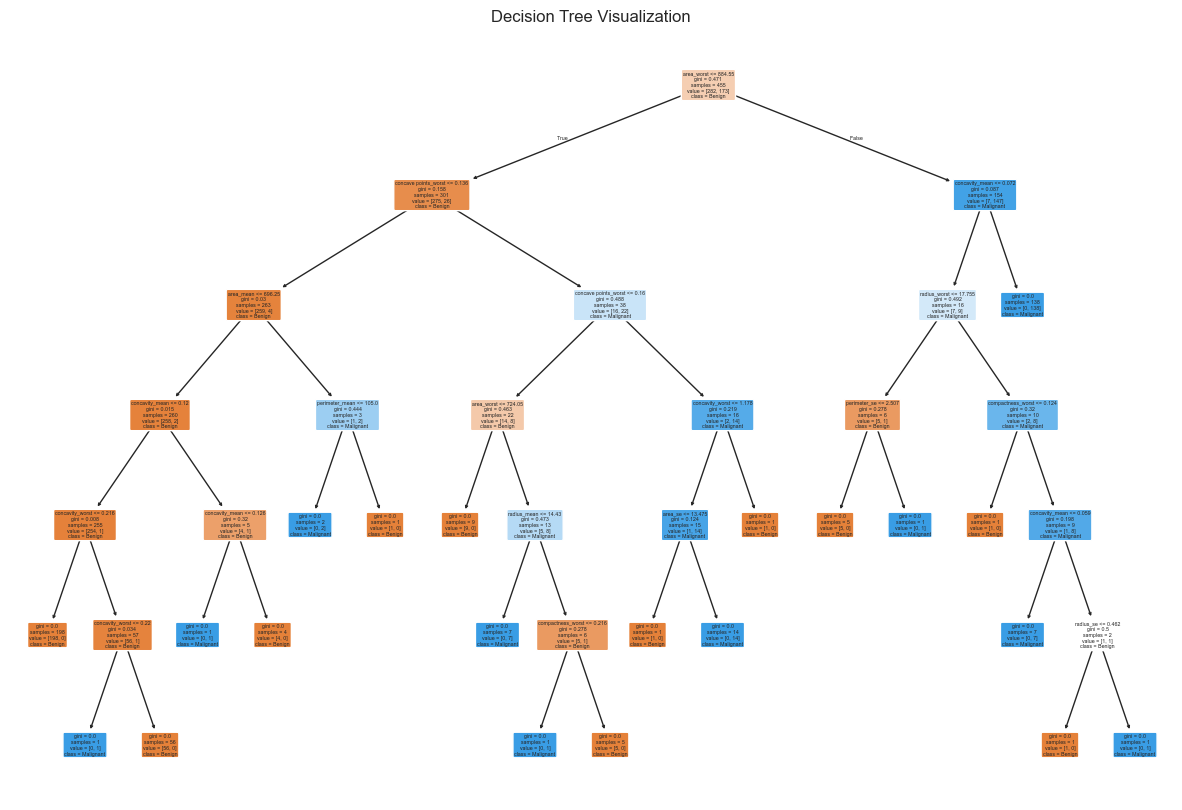

In [36]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)


f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
report = classification_report(Y_test, y_pred, target_names=["Benign", "Malignant"])
print(report)
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# 3.SVM

Best parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.95

F1 Score: 0.8947
Recall: 0.8718
Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Confusion Matrix:
[[72  3]
 [ 5 34]]


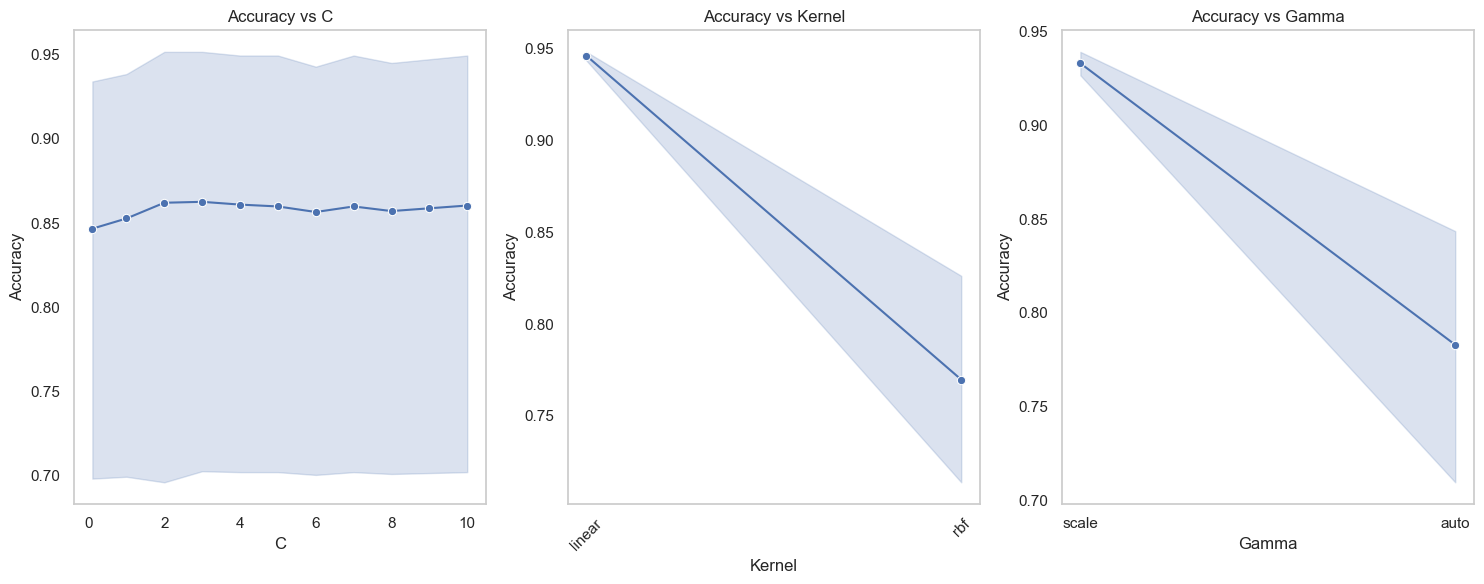

In [37]:
param_grid = {
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] 
}

grid_search = GridSearchCV(
    SVC(random_state=42),  
    param_grid, 
    cv=5, 
    scoring='accuracy',
    error_score='raise'  
)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

svc = SVC(probability=True, random_state=42, **best_params)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

results = pd.DataFrame(grid_search.cv_results_)

mean_test_scores = results['mean_test_score']
param_C = results['param_C'].astype(float)
param_kernel = results['param_kernel']
param_gamma = results['param_gamma']

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x=param_C, y=mean_test_scores, marker='o')
plt.title("Accuracy vs C")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid()

plt.subplot(1, 3, 2)
sns.lineplot(x=param_kernel, y=mean_test_scores, marker='o')
plt.title("Accuracy vs Kernel")
plt.xlabel("Kernel")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.grid()

plt.subplot(1, 3, 3)
sns.lineplot(x=param_gamma, y=mean_test_scores, marker='o')
plt.title("Accuracy vs Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()

# 4.Random forest

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

f1 = f1_score(Y_test, rf_predictions)
recall = recall_score(Y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Accuracy:", accuracy_score(Y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(Y_test, rf_predictions))

F1 Score: 0.9067
Recall: 0.8718
Accuracy: 0.9385964912280702

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.94      0.87      0.91        39

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border: 2px solid rgb(68, 247, 125);
            background-color:#222831;
            overflow:hidden;
            font-weight:400;
            box-shadow: 4px 4px 10px rgba(255, 155, 80, 0.6);">
   <b> Adding a new row of data with our selected features to predict whether it'd be M or B</b>
</div>


# Saving each of the model as pkl to use them in future predictions

In [45]:
with open('rf_model.pkl', 'wb') as f1:
    pickle.dump(rf_model, f1)

with open('lg_model.pkl', 'wb') as f2:
    pickle.dump(lg_model, f2)    

with open('svm_model.pkl', 'wb') as f3:
    pickle.dump(svc, f3) 
    
with open('dt_model.pkl', 'wb') as f4:
    pickle.dump(dt_model, f4)      

# creating a new Data Frame with our selected Features to see it's prediction

In [40]:
feature_names = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
    'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
    'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

# Example input — replace with actual values (MUST be 2D)
new_input_values = [[
    14.2, 88.4, 600.0, 0.110, 0.180, 0.090,
    0.5, 2.0, 20.0, 16.0, 100.5, 800.0,
    0.25, 0.35, 0.20
]]

new_input_df = pd.DataFrame(new_input_values, columns=feature_names)

# applying the prediction of each model on our new Data to see whether it's M or B

In [44]:
models = {
    'Decision Tree': dt_model,
    'SVM': svc,
    'Random Forest': rf_model,
    'Logistic Regression': lg_model
}

for name, model in models.items():
    prediction = model.predict(new_input_df)[0]
    label = 'Malignant (M)' if prediction == 1 else 'Benign (B)'
    print(f"{name} Prediction: {label}")


Decision Tree Prediction: Malignant (M)
SVM Prediction: Benign (B)
Random Forest Prediction: Malignant (M)
Logistic Regression Prediction: Benign (B)


# Making a final decision based on the weights and predictions of each model

In [42]:
total_M = 0
total_B = 0
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        probs = model.predict_proba(new_input_df)[0]
        print(f"{name} Probabilities → M: {probs[0]:.2f}, B: {probs[1]:.2f}")
        
        total_M += probs[0]
        total_B += probs[1]
result = 'M' if total_M > total_B else 'B'
print(f"Final Decision: {result}")


Decision Tree Probabilities → M: 0.00, B: 1.00
SVM Probabilities → M: 0.87, B: 0.13
Random Forest Probabilities → M: 0.31, B: 0.69
Logistic Regression Probabilities → M: 0.92, B: 0.08
Final Decision: M


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #4CAF50;
            background: linear-gradient(45deg, #1E1E1E, #4CAF50);
            overflow:hidden;
            font-weight:400">
   <b>Advanced Visualization</b>
</div>

In [43]:
selected_data

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430,1
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216,1
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628,1
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418,1
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650,1


# Scatter Plot

In [48]:
A = 'area_mean'
B = 'compactness_worst'
selected_data = selected_data.copy()
selected_data.loc[:, 'diagnosis_label'] = selected_data['diagnosis'].map({1: "Malignant", 0: "Benign"})

custom_colors = {
    "Malignant": "red",
    "Benign": "blue"
}

fig = px.scatter(
    selected_data,
    x=A,
    y=B,
    color="diagnosis_label",
    color_discrete_map=custom_colors,
    title=f"s Scatter Plot of : {A} vs {B}"
)

fig.show()


# Box Plot

In [49]:
import plotly.express as px

A = 'area_mean'
B = 'compactness_worst'

selected_data.loc[:, 'diagnosis_label'] = selected_data['diagnosis'].map({1: "Malignant", 0: "Benign"})

custom_colors = {
    "Malignant": "red",
    "Benign": "blue"
}

fig = px.box(
    selected_data,
    x="diagnosis_label", 
    y=A,  
    color="diagnosis_label", 
    color_discrete_map=custom_colors,
    title=f"Box Plot of {A} for Malignant and Benign"
)

fig.show()

fig2 = px.box(
    selected_data,
    x="diagnosis_label",
    y=B,
    color="diagnosis_label",
    color_discrete_map=custom_colors,
    title=f"Box Plot of {B} for Malignant and Benign"
)

fig2.show()


# Correlation Heatmap

In [50]:
import plotly.express as px

selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean']

corr_matrix = selected_data.drop('diagnosis_label',axis=1).corr()

fig = px.imshow(corr_matrix,  
                labels=dict(x="Features", 
                            y="Features"), 
                title="Interactive Heatmap of Correlations for Selected Features",
                text_auto=True,  
                color_continuous_scale='RdBu', 
                zmin=-1,  
                zmax=1)  

fig.update_layout(
    xaxis=dict(tickangle=30),  
    yaxis=dict(),  
    width=800,  
    height=800  
)

fig.show()


# Models Confusion Matrix

In [51]:
import joblib
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load models from pkl files
models = {
    'Logistic Regression': joblib.load('lg_model.pkl'),
    'Decision Tree': joblib.load('dt_model.pkl'),
    'Support Vector Machine': joblib.load('svm_model.pkl'),
    'Random Forest': joblib.load('rf_model.pkl')
}

# Make predictions using the loaded models
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

# Create subplot layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=list(models.keys()),
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

labels = ['Benign', 'Malignant']

i = 1
for idx, (name, preds) in enumerate(predictions.items()):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    cm = confusion_matrix(Y_test, preds)

    # Add heatmap for confusion matrix
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=labels,
            y=labels,
            colorscale='Blues',
            showscale=False,
            hovertemplate='Predicted: %{x}<br>Actual: %{y}<br>Count: %{z}<extra></extra>',
        ),
        row=row,
        col=col
    )

    # Add annotations to the heatmap
    for r in range(len(cm)):
        for c in range(len(cm[r])):
            fig.add_annotation(
                x=labels[c],
                y=labels[r],
                text=str(cm[r][c]),
                showarrow=False,
                font=dict(color='black', size=14),
                row=row,
                col=col
            )
    i += 1

# Final layout updates
fig.update_layout(
    height=800,
    width=900,
    title_text="Interactive Confusion Matrices for 4 Classifiers",
    showlegend=False
)

fig.update_xaxes(title_text="Predicted")
fig.update_yaxes(title_text="Actual")

fig.show()


# All graphs deployed using Dash, with some modifications for UX
# Local Host : http://127.0.0.1:8050/

In [52]:
df = selected_data.copy()

df = df.drop('diagnosis_label',axis=1)
df['diagnosis_label'] = df['diagnosis'].astype(int)

if df['diagnosis_label'].dtype == object:
    df['diagnosis_label'] = df['diagnosis_label'].map({'Benign': 0, 'Malignant': 1}).astype(int)
else:
    df['diagnosis_label'] = df['diagnosis_label'].astype(int)

COLOR_SCHEME = {
    'Benign': '#2196F3',
    'Malignant': '#F44336',
    0: '#2196F3',
    1: '#F44336'
}

selected_features = [
    'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
    'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
    'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

X = df[selected_features]
y = df['diagnosis_label']

# Train a simple model for demonstration
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

models = {
    'Random Forest': rf_model,
    'Logistic Regression': LogisticRegression(max_iter=10000).fit(X_train, Y_train),
    'SVM': SVC(probability=True).fit(X_train, Y_train),
    'DT': DecisionTreeClassifier().fit(X_train, Y_train)
}

viz_df = df[selected_features + ['diagnosis']]

app = dash.Dash(__name__, 
               external_stylesheets=[dbc.themes.BOOTSTRAP],
               suppress_callback_exceptions=True)
app.title = "Breast Cancer Analysis Dashboard"

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Breast Cancer Analysis Dashboard", className="text-center my-4"))),
    
    dcc.Tabs([
        dcc.Tab(label='Distributions', children=[
            dbc.Row([
                dbc.Col([
                    html.H3("Interactive Histogram"),
                    dbc.Row([
                        dbc.Col(dcc.Dropdown(
                            id='hist-feature',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[0]
                        ), width=6),
                        dbc.Col(dcc.Dropdown(
                            id='hist-group',
                            options=[{'label': 'None', 'value': 'None'}] + 
                                   [{'label': 'Diagnosis', 'value': 'diagnosis'}],
                            value='None'
                        ), width=6)
                    ]),
                    dbc.Row([
                        dbc.Col(dcc.Slider(
                            id='hist-bins',
                            min=5, max=100, step=5, value=30,
                            marks={i: str(i) for i in range(5, 101, 10)}
                        ), width=6),
                        dbc.Col(dcc.Slider(
                            id='hist-height',
                            min=300, max=800, step=50, value=500,
                            marks={i: str(i) for i in range(300, 801, 100)}
                        ), width=6)
                    ]),
                    dcc.Graph(id='histogram-plot')
                ])
            ]),
            
            dbc.Row([
                dbc.Col([
                    html.H3("Interactive Box Plot"),
                    dbc.Row([
                        dbc.Col(dcc.Dropdown(
                            id='box-feature',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[0]
                        ), width=6),
                        dbc.Col(dcc.Dropdown(
                            id='box-by',
                            options=[{'label': 'Diagnosis', 'value': 'diagnosis'}],
                            value='diagnosis'
                        ), width=6)
                    ]),
                    dbc.Row([
                        dbc.Col(dcc.Checklist(
                            id='box-log',
                            options=[{'label': 'Log scale', 'value': 'log'}],
                            value=[]
                        ), width=6),
                        dbc.Col(dcc.Slider(
                            id='box-height',
                            min=300, max=800, step=50, value=500,
                            marks={i: str(i) for i in range(300, 801, 100)}
                        ), width=6)
                    ]),
                    dcc.Graph(id='box-plot')
                ])
            ])
        ]),
        
        dcc.Tab(label='Relationships', children=[
            dbc.Row([
                dbc.Col([
                    html.H3("Interactive Scatter Plot"),
                    dbc.Row([
                        dbc.Col(dcc.Dropdown(
                            id='x-feature',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[0]
                        ), width=4),
                        dbc.Col(dcc.Dropdown(
                            id='y-feature',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[1]
                        ), width=4),
                        dbc.Col(dcc.Dropdown(
                            id='color-by',
                            options=[{'label': 'Diagnosis', 'value': 'diagnosis'}],
                            value='diagnosis'
                        ), width=4)
                    ]),
                    dcc.Graph(id='scatter-plot')
                ])
            ]),
            
            dbc.Row([
                dbc.Col([
                    html.H3("Feature Correlation Network"),
                    dbc.Row([
                        dbc.Col(dcc.Slider(
                            id='corr-threshold',
                            min=0.0, max=1.0, step=0.05, value=0.7,
                            marks={i/10: str(i/10) for i in range(0, 11, 2)}
                        ), width=4),
                        dbc.Col(dcc.Dropdown(
                            id='network-layout',
                            options=[
                                {'label': 'Spring', 'value': 'spring'},
                                {'label': 'Circular', 'value': 'circular'},
                                {'label': 'Random', 'value': 'random'}
                            ],
                            value='spring'
                        ), width=4),
                        dbc.Col(dcc.Dropdown(
                            id='node-size-by',
                            options=[
                                {'label': 'Degree', 'value': 'degree'},
                                {'label': 'Importance', 'value': 'importance'},
                                {'label': 'Uniform', 'value': 'uniform'}
                            ],
                            value='degree'
                        ), width=4)
                    ]),
                    dcc.Graph(id='network-graph')
                ])
            ]),
            
            dbc.Row([
                dbc.Col([
                    html.H3("Correlation Heatmap"),
                    dbc.Row([
                        dbc.Col(dcc.Dropdown(
                            id='corr-method',
                            options=[
                                {'label': 'Pearson', 'value': 'pearson'},
                                {'label': 'Spearman', 'value': 'spearman'}
                            ],
                            value='pearson'
                        ), width=6),
                        dbc.Col(dcc.Checklist(
                            id='annot-toggle',
                            options=[{'label': 'Show values', 'value': 'show'}],
                            value=['show']
                        ), width=6)
                    ]),
                    dcc.Graph(id='correlation-heatmap')
                ])
            ])
        ]),
        
        dcc.Tab(label='Model Analysis', children=[
            dbc.Row([
                dbc.Col([
                    html.H3("Model Confusion Matrix"),
                    dcc.Graph(id='confusion-matrix')
                ], width=12)
            ]),
            dbc.Row([
                dbc.Col([
                    html.H3("Feature Importance"),
                    dcc.Slider(
                        id='importance-threshold',
                        min=0.0, max=0.5, step=0.01, value=0.05,
                        marks={i/10: str(i/10) for i in range(0, 6, 1)}
                    ),
                    dcc.Graph(id='feature-importance-plot'),
                    html.Div(id='feature-suggestions')
                ])
            ])
        ]),
        
# Add these dropdowns to your layout in the Model Evaluation tab
        dcc.Tab(label='Model Evaluation', children=[
            dbc.Row([
                dbc.Col([
                    html.H3("Model Comparison"),
                    dcc.Dropdown(
                        id='model-selector',
                        options=[{'label': name, 'value': name} for name in models.keys()],
                        value='Random Forest',
                        multi=True
                    ),
                    dbc.Row([
                        dbc.Col(dcc.Dropdown(
                            id='x-feature-dropdown',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[0]
                        ), width=6),
                        dbc.Col(dcc.Dropdown(
                            id='y-feature-dropdown',
                            options=[{'label': col, 'value': col} for col in selected_features],
                            value=selected_features[1]
                        ), width=6)
                    ]),
                    dbc.Row([
                        dbc.Col(dcc.Graph(id='decision-boundary'), width=6),
                        dbc.Col(dcc.Graph(id='metrics-bar'), width=6)
                    ]),
                    dbc.Row([
                        dbc.Col(dcc.Graph(id='roc-curve'), width=12)
                    ])
                ])
            ])
        ])
    ])
])

@app.callback(
    Output('histogram-plot', 'figure'),
    [Input('hist-feature', 'value'),
     Input('hist-group', 'value'),
     Input('hist-bins', 'value'),
     Input('hist-height', 'value')]
)

def update_histogram(feature, group, bins, height):
    if group == 'None':
        return px.histogram(df, x=feature, nbins=bins, height=height)
    return px.histogram(
        df, x=feature, color='diagnosis', nbins=bins,
        color_discrete_map=COLOR_SCHEME, height=height
    )

@app.callback(
    Output('box-plot', 'figure'),
    [Input('box-feature', 'value'),
     Input('box-by', 'value'),
     Input('box-log', 'value'),
     Input('box-height', 'value')]
)
def update_box_plot(feature, group, log_scale, height):
    return px.box(
        df, x='diagnosis', y=feature, color='diagnosis',
        color_discrete_map=COLOR_SCHEME,
        log_y='log' in log_scale, height=height
    )

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-feature', 'value'),
     Input('y-feature', 'value'),
     Input('color-by', 'value')]
)
def update_scatter(x, y, color):
    return px.scatter(
        df, x=x, y=y, color='diagnosis',
        color_discrete_map=COLOR_SCHEME, height=600
    )

@app.callback(
    Output('network-graph', 'figure'),
    [Input('corr-threshold', 'value'),
     Input('network-layout', 'value'),
     Input('node-size-by', 'value')]
)
def update_network(threshold, layout, size_by):
    corr = df[selected_features].corr().abs()
    edges = corr.stack().reset_index()
    edges.columns = ['source', 'target', 'weight']
    edges = edges[(edges['weight'] > threshold) & (edges['source'] != edges['target'])]
    
    if edges.empty:
        return go.Figure()
    
    G = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')
    
    if size_by == 'degree':
        sizes = [d * 500 for _, d in G.degree()]
    elif size_by == 'importance' and rf_model is not None:
        importances = dict(zip(selected_features, rf_model.feature_importances_))
        sizes = [importances.get(n, 0.1) * 2000 for n in G.nodes()]
    else:
        sizes = [30] * len(G.nodes())
    
    pos = nx.spring_layout(G) if layout == 'spring' else nx.circular_layout(G) if layout == 'circular' else nx.random_layout(G)
    
    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
    
    node_x, node_y = [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
    
    node_trace = go.Scatter(
        x=node_x, y=node_y, mode='markers', hoverinfo='text',
        marker=dict(
            showscale=True, colorscale='YlGnBu', size=sizes, color=sizes,
            colorbar=dict(thickness=15, title='Importance', xanchor='left'),
            line_width=2
        )
    )
    
    node_trace.text = [f"{node}<br>Connections: {G.degree()[node]}" for node in G.nodes()]
    
    fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(
        title=f'Feature Network (Threshold: {threshold})',
        showlegend=False, hovermode='closest', height=600
    ))
    
    for node in G.nodes():
        fig.add_annotation(x=pos[node][0], y=pos[node][1], text=node, showarrow=False, font=dict(size=10))
    
    return fig

@app.callback(
    Output('correlation-heatmap', 'figure'),
    [Input('corr-method', 'value'),
     Input('annot-toggle', 'value')]
)
def update_heatmap(method, annot):
    corr = df[selected_features].corr(method=method).fillna(0)
    
    fig = px.imshow(
        corr, labels=dict(x="", y="", color="Correlation"),
        x=corr.columns, y=corr.columns, color_continuous_scale='RdBu_r',
        zmin=-1, zmax=1, aspect="auto", height=700
    )
    
    if 'show' in annot:
        fig.update_traces(text=np.round(corr.values, 2), texttemplate="%{text}")
    
    return fig

@app.callback(
    Output('confusion-matrix', 'figure'),
    Input('network-layout', 'value')
)
def update_confusion_matrix(_):
    if rf_model is None:
        return go.Figure()
    
    rf_predictions = rf_model.predict(X_test)
    
    cm = confusion_matrix(Y_test, rf_predictions)
    labels = ['Benign', 'Malignant']
    
    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=labels,
        y=labels,
        colorscale='Blues',  
        hovertemplate='Predicted: %{x}<br>Actual: %{y}<br>Count: %{z}<extra></extra>',
        showscale=True
    ))
    
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            fig.add_annotation(
                x=labels[j],
                y=labels[i],
                text=str(cm[i][j]),
                showarrow=False,
                font=dict(color='black', size=16)
            )
    
    fig.update_layout(
        title='Random Forest Confusion Matrix',
        xaxis=dict(title='Predicted'),
        yaxis=dict(title='Actual'),
        margin=dict(t=60, l=60, r=60, b=60),
        height=500  
    )
    
    return fig

@app.callback(
    [Output('feature-importance-plot', 'figure'),
     Output('feature-suggestions', 'children')],
    [Input('importance-threshold', 'value')]
)
def update_feature_importance(threshold):
    if rf_model is None:
        return go.Figure(), []
    
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    fig = px.bar(
        x=np.array(selected_features)[indices],
        y=importances[indices],
        labels={'x': 'Features', 'y': 'Importance'},
        color=np.array(selected_features)[indices],
        color_discrete_sequence=['#2196F3']*len(indices)
    )
    fig.update_layout(showlegend=False, xaxis_tickangle=-45)
    
    important = [selected_features[i] for i in indices if importances[i] > threshold]
    suggestions = []
    
    if important:
        suggestions.append(dbc.Alert(
            f"✅ Keep: {', '.join(important)}", color="success"
        ))
    if len(important) < len(selected_features):
        to_drop = [f for f in selected_features if f not in important]
        suggestions.append(dbc.Alert(
            f"❌ Consider dropping: {', '.join(to_drop)}", color="warning"
        ))
    
    return fig, suggestions

# New callbacks for Model Evaluation tab
@app.callback(
    Output('decision-boundary', 'figure'),
    [Input('model-selector', 'value'),
     Input('x-feature-dropdown', 'value'),
     Input('y-feature-dropdown', 'value')]
)
def update_boundary(m, feature_x, feature_y):
    if isinstance(m, list):
        m = m[0]  # Just use the first selected model for the boundary
    mdl = models[m]
    
    # Create grid for the selected features
    xx, yy = np.meshgrid(
        np.linspace(X[feature_x].min(), X[feature_x].max(), 100),
        np.linspace(X[feature_y].min(), X[feature_y].max(), 100)
    )
    
    # Create a DataFrame with all features set to their mean values
    grid_points = pd.DataFrame(
        np.tile(X.mean(axis=0).values, (xx.ravel().shape[0], 1)),
        columns=X.columns
    )
    
    # Update the selected features with our grid values
    grid_points[feature_x] = xx.ravel()
    grid_points[feature_y] = yy.ravel()
    
    # Ensure we maintain the same feature order as during training
    grid_points = grid_points[X.columns]
    
    if hasattr(mdl, 'predict_proba'):
        Z = mdl.predict_proba(grid_points)[:, 1].reshape(xx.shape)
    else:
        Z = mdl.predict(grid_points).reshape(xx.shape)
    
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=xx[0], y=yy[:, 0], z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.3,
        contours=dict(start=0, end=1, size=0.1)
    ))
    fig.add_trace(go.Scatter(
        x=X[feature_x], y=X[feature_y],
        mode='markers',
        marker=dict(color=y, colorscale='Viridis'),
        name='Data'
    ))
    fig.update_layout(title=f'Decision Boundary ({m}) - {feature_x} vs {feature_y}')
    return fig
@app.callback(
    Output('metrics-bar', 'figure'),
    Input('model-selector', 'value')
)
def update_metrics(m):
    if not isinstance(m, list):
        m = [m]
    
    fig = go.Figure()
    
    for model_name in m:
        mdl = models[model_name]
        pred = mdl.predict(X)
        vals = [
            accuracy_score(y, pred),
            precision_score(y, pred),
            recall_score(y, pred),
            f1_score(y, pred)
        ]
        fig.add_trace(go.Bar(
            x=['Accuracy', 'Precision', 'Recall', 'F1'],
            y=vals,
            name=model_name
        ))
    
    fig.update_layout(
        title='Model Metrics Comparison',
        yaxis=dict(range=[0, 1]),
        barmode='group'
    )
    return fig

@app.callback(
    Output('roc-curve', 'figure'),
    Input('model-selector', 'value')
)
def update_roc(m):
    if not isinstance(m, list):
        m = [m]
    
    fig = go.Figure()
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    
    for i, model_name in enumerate(m):
        mdl = models[model_name]
        if hasattr(mdl, 'predict_proba'):
            score = mdl.predict_proba(X)[:, 1]
        else:
            score = mdl.decision_function(X)
        fpr, tpr, _ = roc_curve(y, score)
        fig.add_trace(go.Scatter(
            x=fpr, y=tpr,
            mode='lines',
            name=f'{model_name} (AUC = {np.trapz(tpr, fpr):.2f})',
            line=dict(color=colors[i % len(colors)])
        ))
    
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        line=dict(dash='dash', color='gray'),
        name='Chance'
    ))
    fig.update_layout(
        title='ROC Curves',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate'
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True)